In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
original_df = pd.read_csv('salaries.csv')

In [3]:
original_df.shape

(1978155, 11)

In [4]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978155 entries, 0 to 1978154
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   entidadfederativa     object 
 1   sujetoobligado        object 
 2   nombre                object 
 3   denominacion          object 
 4   montoneto             float64
 5   cargo                 object 
 6   area                  object 
 7   montobruto            float64
 8   idInformacion         int64  
 9   periodoreportainicio  object 
 10  periodoreportafin     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 166.0+ MB


In [5]:
original_df.isna().sum()

entidadfederativa           0
sujetoobligado              0
nombre                  31618
denominacion            52799
montoneto               89176
cargo                   52799
area                    33218
montobruto              39422
idInformacion               0
periodoreportainicio        0
periodoreportafin           0
dtype: int64

In [6]:
denominacion=original_df['denominacion']
denominacion

0                                                  Fontanero
1                                 AUXILIAR DE ENFERMERIA "A"
2                                            POLICIA PRIMERO
3                          APOYO Y ASISTENCIA A LA EDUCACION
4                                                   DIRECTOR
                                 ...                        
1978150                                            Operativo
1978151    JEFE DE OFICINA                               ...
1978152              TECNICO EN ATENCION PRIMARIA A LA SALUD
1978153                                      Policía Segundo
1978154               OPERARIO DE PRIMERA (DIVERSOS OFICIOS)
Name: denominacion, Length: 1978155, dtype: object

## La denominación es el nombre oficial del cargo en cuestión del trabajador

In [7]:
montoneto=original_df['montoneto']
montoneto

0           4000.00
1          12177.86
2          11652.00
3          10180.57
4          17004.40
             ...   
1978150    12119.57
1978151         NaN
1978152     7978.94
1978153     6190.95
1978154    14344.02
Name: montoneto, Length: 1978155, dtype: float64

In [8]:
montobruto=original_df['montobruto']
montobruto

0           4254.00
1          16092.00
2          16030.00
3           2910.65
4           6188.40
             ...   
1978150    13766.68
1978151     9882.12
1978152    20300.52
1978153     6190.95
1978154    16595.33
Name: montobruto, Length: 1978155, dtype: float64

## El monto bruto es la cantidad total resultante de cualquier actividad, sin haber aplicado ningún descuento ni impuesto mientras el monto neto es ya descontado cualqueir impuesto o descuento.

In [9]:
df_cleaned = original_df.dropna(how='all')
df_cleaned.isna().sum()

entidadfederativa           0
sujetoobligado              0
nombre                  31618
denominacion            52799
montoneto               89176
cargo                   52799
area                    33218
montobruto              39422
idInformacion               0
periodoreportainicio        0
periodoreportafin           0
dtype: int64

## Se eliminan todas las filas vacias, aunque en este caso no existen y se puede usar el original_df igual que el df_cleaned.

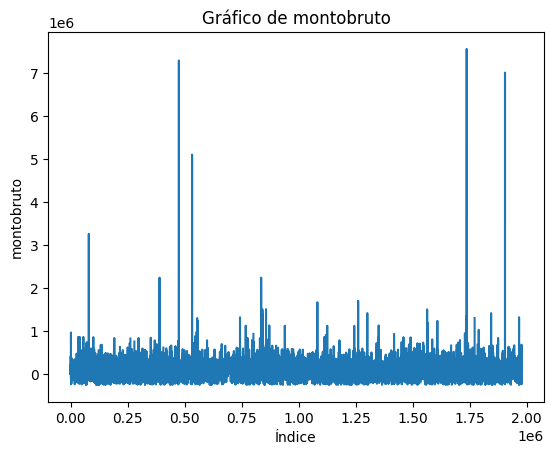

In [10]:
montobruto.plot(kind='line')
plt.xlabel('Índice')
plt.ylabel('montobruto')
plt.title('Gráfico de montobruto')
plt.show()

## Se aprecian varios valores que pueden ser considerados outliers y se revisa usando la desviación estandar

In [11]:
mean=montobruto.std()
std_dev = montobruto.std()
threshold = 2  # Umbral en desviaciones estándar

outliers_std = original_df[(original_df['montobruto'] > mean + threshold * std_dev) | (original_df['montobruto'] < mean - threshold * std_dev)]

# **Método del Rango Intercuartílico (IQR)**
Q1 = montobruto.quantile(0.25)
Q3 = montobruto.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = original_df[(original_df['montobruto'] < lower_bound) | (original_df['montobruto'] > upper_bound)]

print("Outliers usando desviación estándar:")
print(outliers_std)

print("Outliers usando IQR:")
print(outliers_iqr)

Outliers usando desviación estándar:
           entidadfederativa  \
49       Baja California Sur   
58                Federación   
116                Chihuahua   
147                Chihuahua   
169                Chihuahua   
...                      ...   
1977954             Campeche   
1977984  Baja California Sur   
1978082           Federación   
1978089            Chihuahua   
1978108            Chihuahua   

                                            sujetoobligado  \
49       Colegio de Estudios Científicos y Tecnológicos...   
58       Autoridad Educativa Federal en la Ciudad de Mé...   
116                                 H. Congreso del Estado   
147                                 Secretaría de Hacienda   
169                                 Secretaría de Hacienda   
...                                                    ...   
1977954  Sistema para el Desarrollo Integral de la Fami...   
1977984                             COLEGIO DE BACHILLERES   
1978082  Fideicomiso

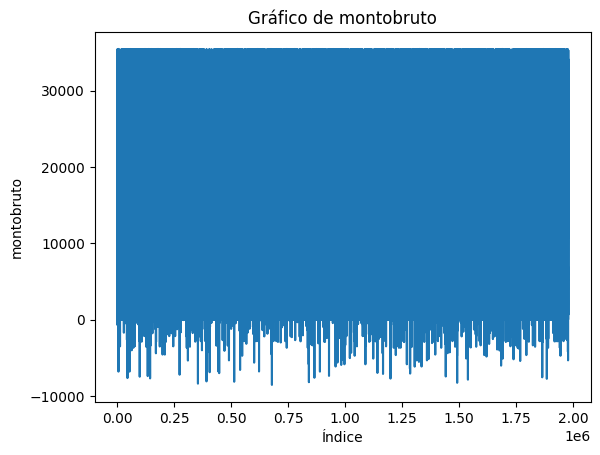

In [12]:
df_cleaned_montobruto = original_df[(original_df['montobruto'] >= lower_bound) & (original_df['montobruto'] <= upper_bound)]
df_cleaned_montobruto['montobruto'].plot(kind='line')
plt.xlabel('Índice')
plt.ylabel('montobruto')
plt.title('Gráfico de montobruto')
plt.show()


## Se observa una serie de valores negativos los cuales en el monto bruto no tienen sentido, por tanto, se le aplica el valor absoluto

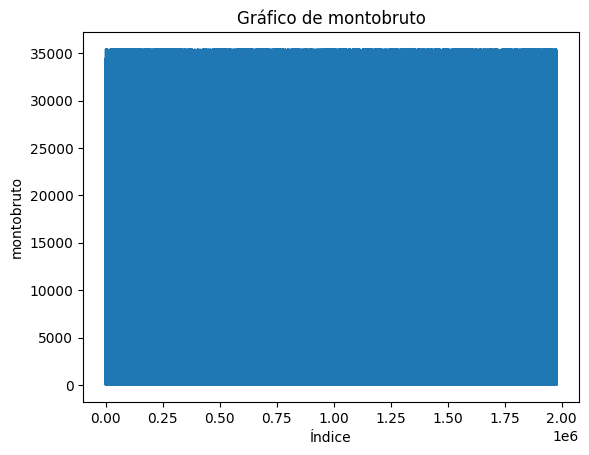

In [13]:
abs_montobruto=df_cleaned_montobruto['montobruto'].abs()
abs_montobruto.plot(kind='line')
plt.xlabel('Índice')
plt.ylabel('montobruto')
plt.title('Gráfico de montobruto')
plt.show()

## Con esta serie de datos ya es posible usar la media y aplicarse a los valores nulos de la columna montobruto debido a que se puede sacar una media en los valores faltantes del salario

In [14]:
mean=abs_montobruto.mean()
print(mean)


12657.901425859487


In [15]:
original_df.fillna(value={'montobruto': mean }, inplace=True)

# Verificamos nuevamente el número de nulos.
original_df.isna().sum()

entidadfederativa           0
sujetoobligado              0
nombre                  31618
denominacion            52799
montoneto               89176
cargo                   52799
area                    33218
montobruto                  0
idInformacion               0
periodoreportainicio        0
periodoreportafin           0
dtype: int64

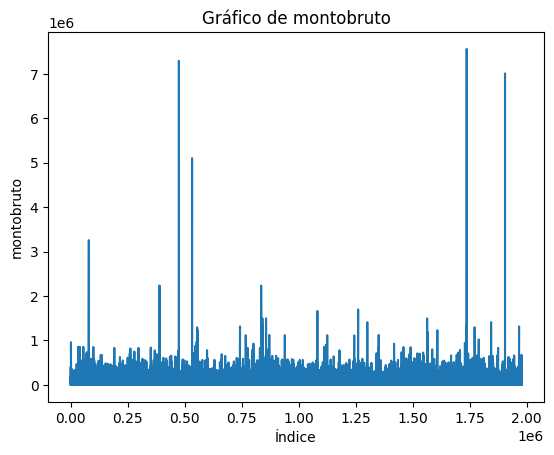

In [16]:
cleaned_montobruto=original_df['montobruto'].abs()
cleaned_montobruto.plot(kind='line')
plt.xlabel('Índice')
plt.ylabel('montobruto')
plt.title('Gráfico de montobruto')
plt.show()

## Se aprecia que ahora todos los valores nulos ahora son la media y no existen valores negativos

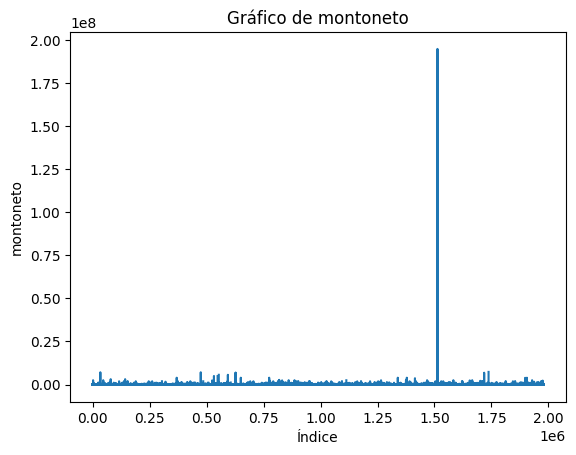

In [17]:
original_df['montoneto'].plot(kind='line')
plt.xlabel('Índice')
plt.ylabel('montoneto')
plt.title('Gráfico de montoneto')
plt.show()

In [18]:
max_montoneto=original_df['montoneto'].max()
print(max_montoneto)

194733625.0


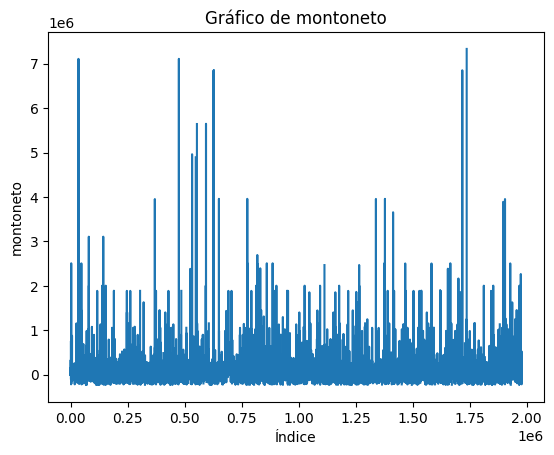

In [19]:
original_df['montoneto'] = original_df['montoneto'].replace(max_montoneto, 0)

original_df['montoneto'].plot(kind='line')
plt.xlabel('Índice')
plt.ylabel('montoneto')
plt.title('Gráfico de montoneto')
plt.show()

## Se observan valores negativos y se hace un valor absoluto

In [20]:
original_df['montoneto']=original_df['montoneto'].abs()

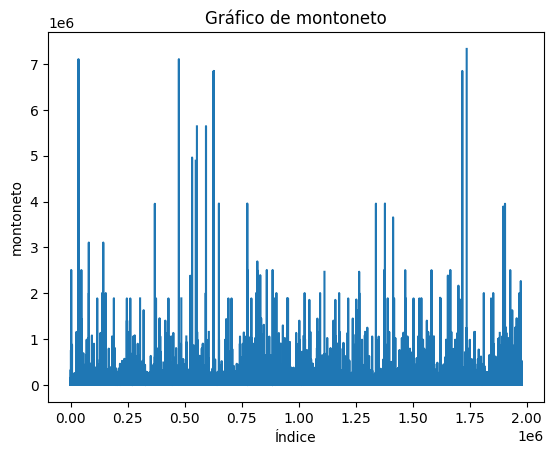

In [21]:
original_df['montoneto'].plot(kind='line')
plt.xlabel('Índice')
plt.ylabel('montoneto')
plt.title('Gráfico de montoneto')
plt.show()

## Se observa que existe un/unos valor/valores que parecen outliers, por lo cual se vuelve a hacer un filtro con el rango intercuartil

In [22]:
mean=montoneto.mean()
std_dev = montoneto.std()
threshold = 2 # Umbral en desviaciones estándar

outliers_std = original_df[(original_df['montoneto'] > mean + threshold * std_dev) | (original_df['montoneto'] < mean - threshold * std_dev)]

# **Método del Rango Intercuartílico (IQR)**
Q1 = montobruto.quantile(0.25)
Q3 = montobruto.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = original_df[(original_df['montoneto'] < lower_bound) | (original_df['montoneto'] > upper_bound)]

print("Outliers usando desviación estándar:")
print(outliers_std)

print("Outliers usando IQR:")
print(outliers_iqr)

Outliers usando desviación estándar:
           entidadfederativa  \
147                Chihuahua   
1150               Chihuahua   
2252        Ciudad de México   
5754        Ciudad de México   
25234       Ciudad de México   
...                      ...   
1966272     Ciudad de México   
1967009               Puebla   
1968353     Ciudad de México   
1974621     Ciudad de México   
1977742  Baja California Sur   

                                            sujetoobligado  \
147                                 Secretaría de Hacienda   
1150                                Secretaría de Hacienda   
2252                     Secretaría de Seguridad Ciudadana   
5754                     Secretaría de Seguridad Ciudadana   
25234    Secretaría de Gestión Integral de Riesgos y Pr...   
...                                                    ...   
1966272                  Secretaría de Seguridad Ciudadana   
1967009                   CRIT Puebla  (Fundación Teletón)   
1968353  Secretaría 

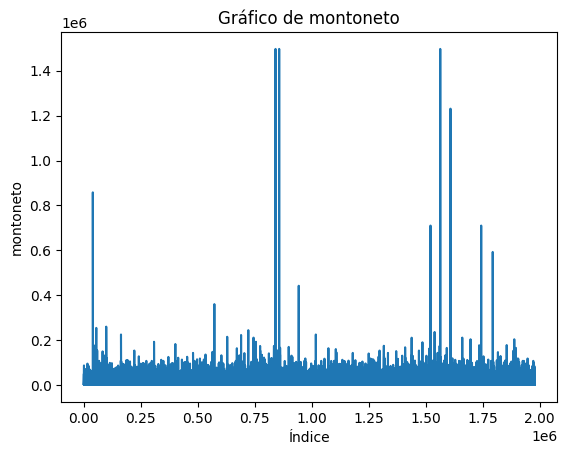

In [23]:
df_cleaned_montoneto = original_df[(original_df['montoneto'] >= lower_bound) & (original_df['montoneto'] <= upper_bound)]
df_cleaned_montoneto['montobruto'].abs().plot(kind='line')
plt.xlabel('Índice')
plt.ylabel('montoneto')
plt.title('Gráfico de montoneto')
plt.show()


In [24]:
mean_montoneto=df_cleaned_montoneto['montoneto'].mean()
print(mean_montoneto)
print(df_cleaned_montoneto['montoneto'].min)

10696.497135108419
<bound method Series.min of 0           4000.00
1          12177.86
2          11652.00
3          10180.57
4          17004.40
             ...   
1978149     9984.44
1978150    12119.57
1978152     7978.94
1978153     6190.95
1978154    14344.02
Name: montoneto, Length: 1792368, dtype: float64>


In [25]:
original_df.fillna(value={'montoneto': mean_montoneto }, inplace=True)

# Verificamos nuevamente el número de nulos.
original_df.isna().sum()

entidadfederativa           0
sujetoobligado              0
nombre                  31618
denominacion            52799
montoneto                   0
cargo                   52799
area                    33218
montobruto                  0
idInformacion               0
periodoreportainicio        0
periodoreportafin           0
dtype: int64

<Axes: >

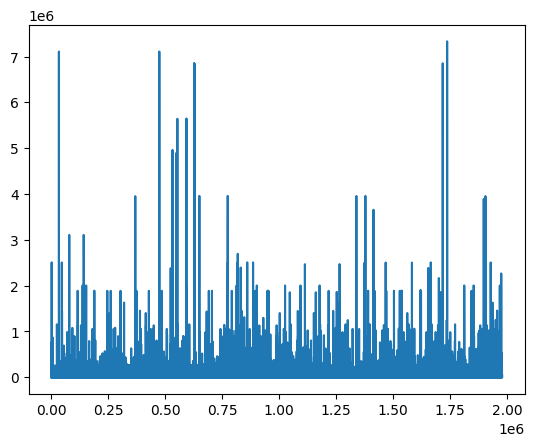

In [26]:
original_df['montoneto'] = original_df['montoneto'].replace(0, mean_montoneto)

original_df['montoneto'].plot()

In [27]:
original_df[['denominacion', 'cargo']]

,denominacion,cargo
0,Fontanero,Fontanero
1,"AUXILIAR DE ENFERMERIA ""A""","AUXILIAR DE ENFERMERIA ""A"""
2,POLICIA PRIMERO,POLICIA PRIMERO
3,APOYO Y ASISTENCIA A LA EDUCACION,APOYO Y ASISTENCIA A LA EDUCACION
4,DIRECTOR,DIRECTOR
...,...,...
1978150,Operativo,Operativo
1978151,JEFE DE OFICINA ...,JEFE DE OFICINA ...
1978152,TECNICO EN ATENCION PRIMARIA A LA SALUD,TECNICO EN ATENCION PRIMARIA A LA SALUD
1978153,Policía Segundo,Policía Segundo


In [28]:
original_df[['denominacion', 'cargo']].head()

,denominacion,cargo
0,Fontanero,Fontanero
1,"AUXILIAR DE ENFERMERIA ""A""","AUXILIAR DE ENFERMERIA ""A"""
2,POLICIA PRIMERO,POLICIA PRIMERO
3,APOYO Y ASISTENCIA A LA EDUCACION,APOYO Y ASISTENCIA A LA EDUCACION
4,DIRECTOR,DIRECTOR


In [29]:
original_df[['denominacion', 'cargo']].tail()

,denominacion,cargo
1978150,Operativo,Operativo
1978151,JEFE DE OFICINA ...,JEFE DE OFICINA ...
1978152,TECNICO EN ATENCION PRIMARIA A LA SALUD,TECNICO EN ATENCION PRIMARIA A LA SALUD
1978153,Policía Segundo,Policía Segundo
1978154,OPERARIO DE PRIMERA (DIVERSOS OFICIOS),OPERARIO DE PRIMERA (DIVERSOS OFICIOS)


In [30]:
diferencias = original_df[original_df['denominacion'] != original_df['cargo']]

print("Filas con diferencias:")
print(diferencias)

Filas con diferencias:
        entidadfederativa                                   sujetoobligado  \
16             Federación             Instituto Politécnico Nacional (IPN)   
109            Federación             Instituto Politécnico Nacional (IPN)   
171            Federación             Universidad Autónoma Chapingo (UACH)   
181       San Luis Potosí    HOSPITAL CENTRAL "DR. IGNACIO MORONES PRIETO"   
188               Chiapas              Ayuntamiento de Venustiano Carranza   
...                   ...                                              ...   
1977822           Sinaloa      OA00700-Universidad Autónoma de Sinaloa\r\n   
1977992   San Luis Potosí  SECRETARÍA DE EDUCACIÓN DEL GOBIERNO DEL ESTADO   
1978014          Guerrero                           Oficina del Gobernador   
1978087           Tabasco                        SECRETARÍA DE SALUD (SSA)   
1978141        Federación             Instituto Politécnico Nacional (IPN)   

                                nombre d